In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv


In [2]:
#csv dosyasını okuma 
df = pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv',nrows=50000)

In [3]:
#veri setinin ilk 20 satırını görme
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
# Veri setinin bilgilerini incelemek için
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   type            50000 non-null  object 
 2   amount          50000 non-null  float64
 3   nameOrig        50000 non-null  object 
 4   oldbalanceOrg   50000 non-null  float64
 5   newbalanceOrig  50000 non-null  float64
 6   nameDest        50000 non-null  object 
 7   oldbalanceDest  50000 non-null  float64
 8   newbalanceDest  50000 non-null  float64
 9   isFraud         50000 non-null  int64  
 10  isFlaggedFraud  50000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 4.2+ MB


In [5]:
# Eksik değerleri kontrol etmek için
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# Sayısal kolonların özet istatistik bilgileri
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,50000.0
mean,7.453800,1.562645e+05,7.333083e+05,7.472741e+05,8.444671e+05,1.164400e+06,0.002000,0.0
std,2.056636,3.243949e+05,2.202405e+06,2.239971e+06,2.433388e+06,2.915203e+06,0.044677,0.0
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,7.000000,7.734573e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,3.341482e+04,1.703072e+04,0.000000e+00,2.126000e+03,0.000000e+00,0.000000,0.0
75%,9.000000,1.878390e+05,1.331716e+05,1.438734e+05,4.632050e+05,8.649264e+05,0.000000,0.0
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,3.014320e+07,3.197699e+07,1.000000,0.0


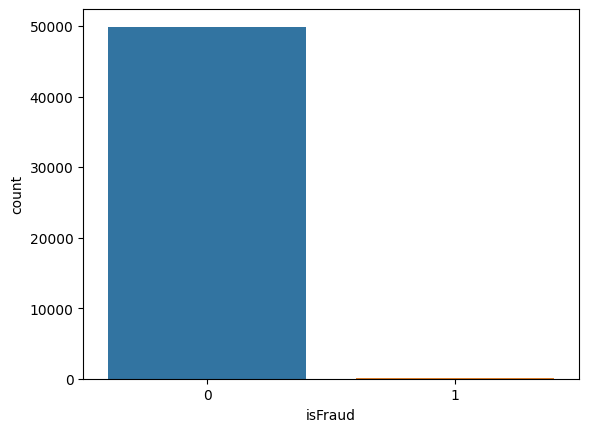

In [7]:
# isFraud kolonunun dağılımını incelemek
sns.countplot(x='isFraud', data=df)
plt.show()

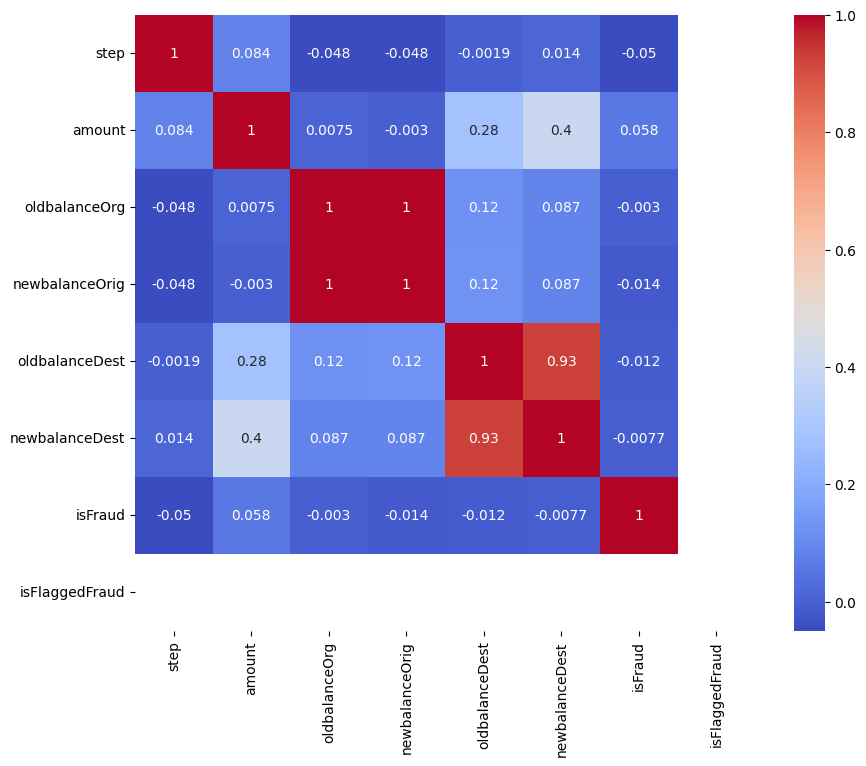

In [8]:
# Sadece sayısal sütunların seçimi
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisi
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
#gereksiz kolonları atma işlemi
df = df.drop(['nameOrig', 'nameDest'], axis=1)
df.head(20)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0,0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


In [10]:
#Kategorik veriler için  Label Encoding veya One-Hot Encoding yapmamız gerekir."type" sütunu kategorik olduğundan bunu One-Hot Encoding ile sayısal hale getirebiliriz: 
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,True,False


In [11]:
#eğitim ve test kümelerini bölmek
from sklearn.model_selection import train_test_split

X = df.drop(['isFraud'], axis=1)  # Tahmin edilecek hedef
y = df['isFraud']  # Hedef değişken

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [12]:
 #Logistic Regression algoritmasını kullanmak
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("LogisticRegression Doğruluğu:", accuracy_score(y_test, predictions))

[[19953     4]
 [   40     3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19957
           1       0.43      0.07      0.12        43

    accuracy                           1.00     20000
   macro avg       0.71      0.53      0.56     20000
weighted avg       1.00      1.00      1.00     20000

LogisticRegression Doğruluğu: 0.9978


In [14]:
X_unsupervised = df.drop(columns=['isFraud'])
X_unsupervised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   amount          50000 non-null  float64
 2   oldbalanceOrg   50000 non-null  float64
 3   newbalanceOrig  50000 non-null  float64
 4   oldbalanceDest  50000 non-null  float64
 5   newbalanceDest  50000 non-null  float64
 6   isFlaggedFraud  50000 non-null  int64  
 7   type_CASH_OUT   50000 non-null  bool   
 8   type_DEBIT      50000 non-null  bool   
 9   type_PAYMENT    50000 non-null  bool   
 10  type_TRANSFER   50000 non-null  bool   
dtypes: bool(4), float64(5), int64(2)
memory usage: 2.9 MB


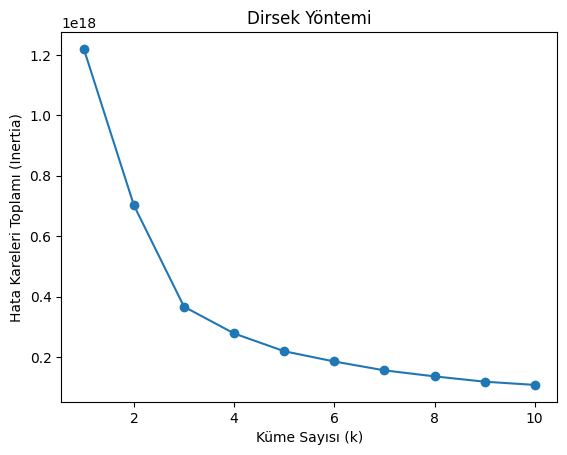

In [15]:
# Farklı k değerleri için hata kareleri toplamını hesaplayalım
from sklearn.cluster import KMeans
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=12, random_state=0)
    kmeans.fit(X_unsupervised)  # İlk 50.000 veriyi kullanarak eğitiyoruz
    inertia.append(kmeans.inertia_)

# Dirsek grafiğini çizelim
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Hata Kareleri Toplamı (Inertia)')
plt.title('Dirsek Yöntemi')
plt.show()


In [16]:
# Optimal k değerini 3 olarak belirledim
optimal_k = 3

# KMeans modelini optimal k değeri ile eğitimi
kmeans = KMeans(n_clusters=optimal_k, n_init=12, random_state=0)
kmeans.fit(X_unsupervised)

# Küme merkezlerini alma
centroids = kmeans.cluster_centers_

# Her veri noktasının hangi kümeye atandığını görme
labels = kmeans.labels_

# Küme merkezlerini ve kümeleri incelemek için çıktı alma
print("Küme merkezleri:", centroids)
print("Veri noktalarının kümeleri:", labels)


Küme merkezleri: [[ 7.49346442e+00  1.36973700e+05  2.04918016e+05  2.09049494e+05
   3.47677728e+05  5.89630854e+05  0.00000000e+00  2.87768004e-01
   1.40835564e-02  4.91282144e-01  9.02157529e-02]
 [ 7.03018293e+00  1.55922376e+05  7.64034066e+06  7.77716438e+06
   1.09911064e+06  1.21624489e+06  0.00000000e+00  4.87804878e-03
  -2.06432094e-16  2.28658537e-02  3.96341463e-03]
 [ 7.28929987e+00  5.34326788e+05  1.09938289e+06  1.12838559e+06
   1.02000635e+07  1.23391505e+07  0.00000000e+00  4.17877587e-01
   6.16468516e-03 -1.99840144e-15  2.98106561e-01]]
Veri noktalarının kümeleri: [0 0 0 ... 0 0 0]


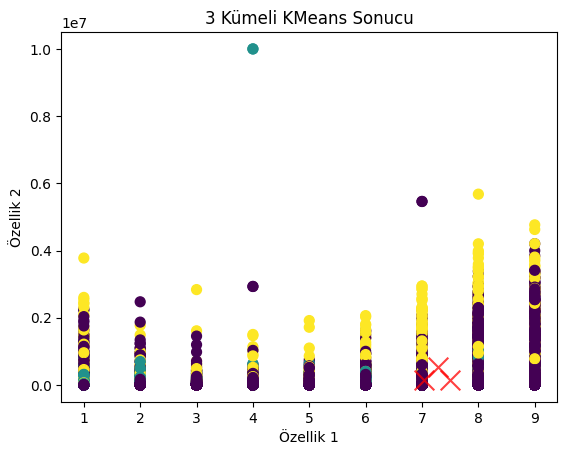

In [17]:
plt.scatter(X_unsupervised.iloc[:, 0], X_unsupervised.iloc[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='x')  # Küme merkezlerini kırmızı ile gösterelim
plt.title(f'{optimal_k} Kümeli KMeans Sonucu')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()


In [18]:
from sklearn.metrics import silhouette_score

# Küme atamalarına göre silhouette skorunu hesaplayalım
silhouette_avg = silhouette_score(X_unsupervised, labels)
print(f"Silhouette skoru: {silhouette_avg}")


Silhouette skoru: 0.8003197301795966
